# Plot Individual parcellations


In [17]:
import sys
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
import ProbabilisticParcellation.hierarchical_clustering as cl
import Functional_Fusion.dataset as ds
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt
import numpy as np
import nitools as nt
import os
import nibabel as nb
import Functional_Fusion.atlas_map as am


In [3]:

figure_path = "/Users/callithrix/Documents/figures_AtlasPaper/"


# Individual Parcellations

In [4]:
atlas = 'MNISymC2'
figsize = (20, 20)
aname = 'NettekovenAsym32'
modelname = f'Models_03/{aname}_space-MNISymC2'

# To get individual parcellations (previously saved as pytorch tensor to save 
# time) run the following script:
# scripts/individual_variability.py/export_uhats
# Which Calls: 
# evaluate/get_individual_parcellation


prob_indiv = pt.load(f'{ut.model_dir}/Models/{modelname}_Uhat.pt').numpy()

# Get parcels
parcels_indiv = np.array(prob_indiv.argmax(axis=1) + 1)


In [5]:
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap_labels, labels = nt.read_lut(ut.export_dir +
                                     f'{aname}.lut')


# Plot pontine subject 96's parcellation

/Users/callithrix/code/Python/SUITPy/SUITPy/flatmap.py:660: RuntimeWarning: invalid value encountered in cast
  data_arr = data_arr.astype(int)


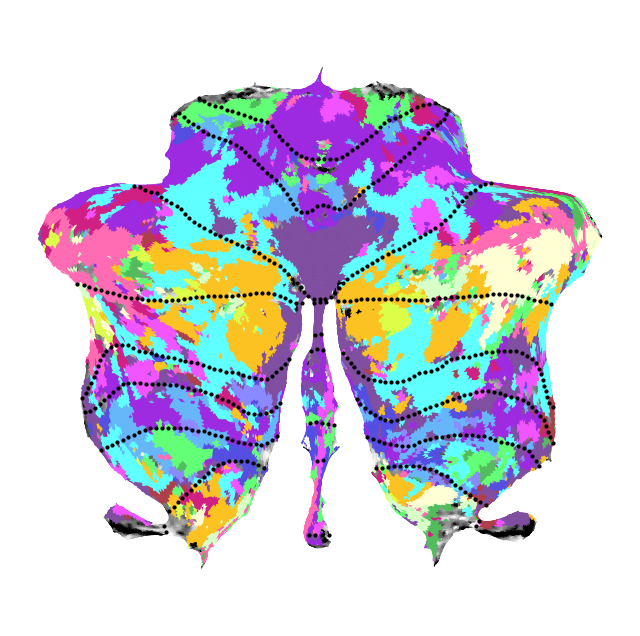

In [6]:
subject_c = 27
plt.figure(figsize=(8, 8))
ut.plot_data_flat(parcels_indiv[subject_c], atlas,
                   cmap=cmap_labels,
                   dtype='label',
                   colorbar=False,
                   bordersize=4,
                   bordercolor='k',
                   backgroundcolor='w')
plt.savefig(figure_path + 'individ_parcel_sub-96.png',dpi=300,bbox_inches='tight')

# Explore MDTB subject 10's parcellation in 32 regions

In [15]:
subject=9
prob_individual = prob_indiv[subject]
parcels_individual = parcels_indiv[subject]

/Users/callithrix/code/Python/SUITPy/SUITPy/flatmap.py:660: RuntimeWarning: invalid value encountered in cast
  data_arr = data_arr.astype(int)


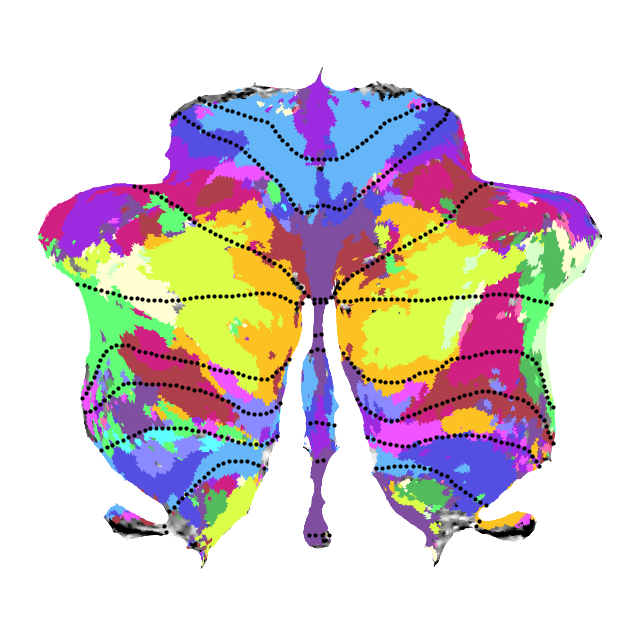

In [7]:
plt.figure(figsize=(8, 8))
ut.plot_data_flat(parcels_individual, atlas,
                   cmap=cmap_labels,
                   dtype='label',
                   colorbar=False,
                   bordersize=4,
                   bordercolor='k',
                   backgroundcolor='w')
plt.savefig(figure_path + 'individ_parcel_09.png',dpi=300,bbox_inches='tight')

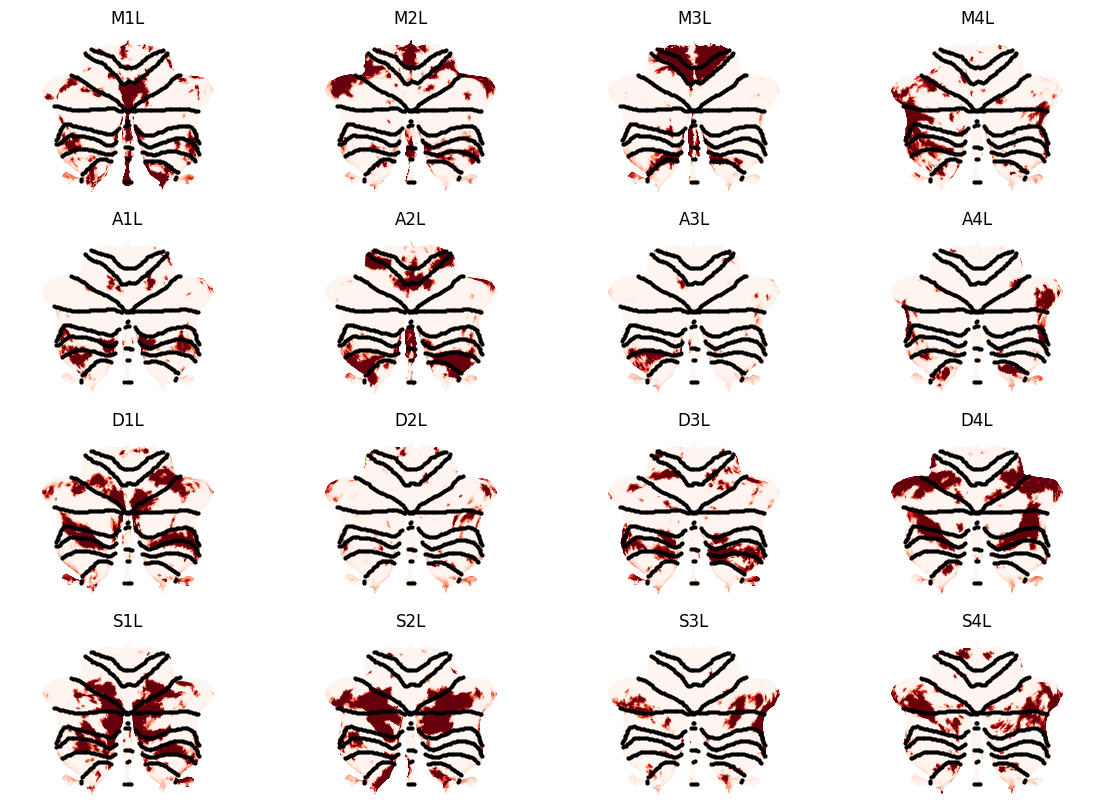

In [14]:
subset=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
plt.figure(figsize=(14, 10))
fig = ut.plot_model_pmaps(prob_individual, atlas, labels=labels[1:], subset=subset, grid=(4, 4))
subset_name = "-".join([str(s) for s in subset])

filename = f"{figure_path}/pmaps_{subset_name}.png"
plt.savefig(filename, format="png")

In [20]:
# Export prob_indiv[9] as nifti
suit_atlas, ainf = am.get_atlas(atlas, ut.base_dir + '/Atlases')
probseg = suit_atlas.data_to_nifti(prob_individual)
nb.save(probseg, f"{figure_path}/subject_probseg.nii")

# Explore MDTB subject 10's parcellation in 68 regions

In [22]:
aname = 'NettekovenAsym128'
modelname = f'Models_03/{aname}_space-MNISymC2'

# To get individual parcellations (previously saved as pytorch tensor to save 
# time) run the following script:
# scripts/individual_variability.py/export_uhats
# Which Calls: 
# evaluate/get_individual_parcellation


prob_indiv_128 = pt.load(f'{ut.model_dir}/Models/{modelname}_Uhat.pt').numpy()

# Get parcels
parcels_indiv_128 = np.array(prob_indiv.argmax(axis=1) + 1)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/callithrix/Documents/Projects/Functional_Fusion//Models/Models_03/NettekovenAsym128_space-MNISymC2_Uhat.pt'